In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
import warnings
warnings.filterwarnings('ignore')


In [3]:
ds=pd.read_csv('mushrooms.csv')

In [4]:
ds

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
ds=pd.DataFrame(data=ds)

In [6]:
ds.shape

(8124, 23)

In [7]:
ds.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
ds.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [9]:
ds.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

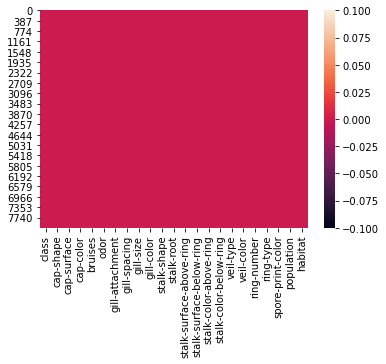

In [10]:
sns.heatmap(ds.isnull())

In [11]:
ds.describe

<bound method NDFrame.describe of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-r

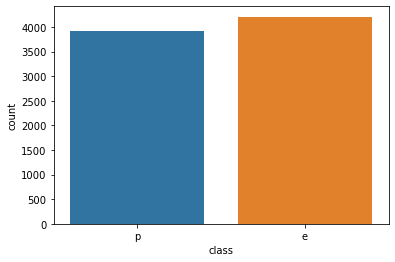

In [12]:
sns.countplot(x="class",data=ds)
plt.show()

In [13]:
ds= ds.astype('category')
ds.dtypes
ds=ds.apply(LabelEncoder().fit_transform)

In [14]:
ds.head

<bound method NDFrame.head of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0         

In [15]:
ds.describe

<bound method NDFrame.describe of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0     

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


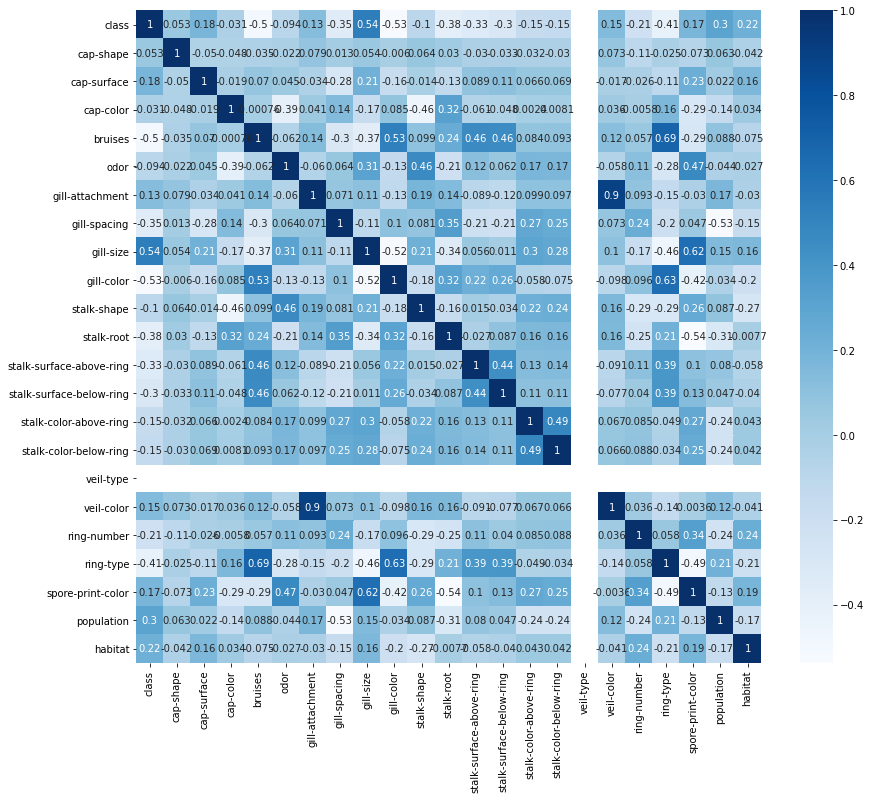

In [16]:
"""plt.figure(figsize(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap='Blue',annot=True,annot_kws={"size":7})
plt.yticks(rotation=0)"""
fig=plt.figure(figsize=(14,12))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")
hc

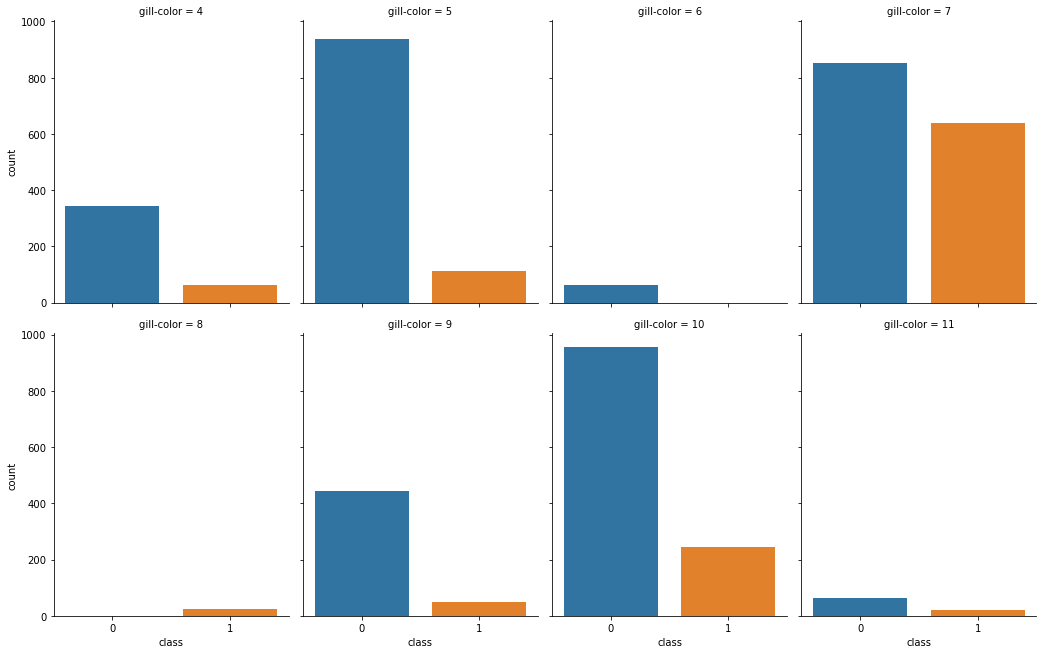

In [17]:
new_var=ds[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor2.png", format='png', dpi=400, bbox_inches='tight')

In [18]:
x = ds.drop(columns=["class"])
y=ds[["class"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)

In [19]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


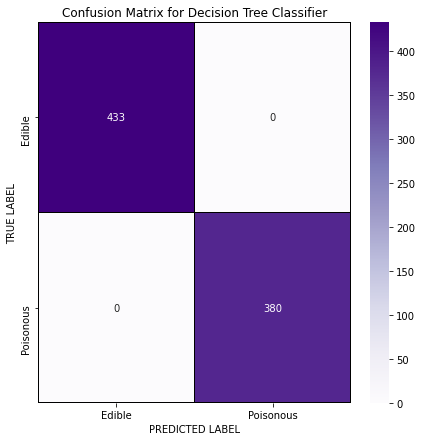

In [20]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [21]:
ds.skew

<bound method DataFrame.skew of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0       

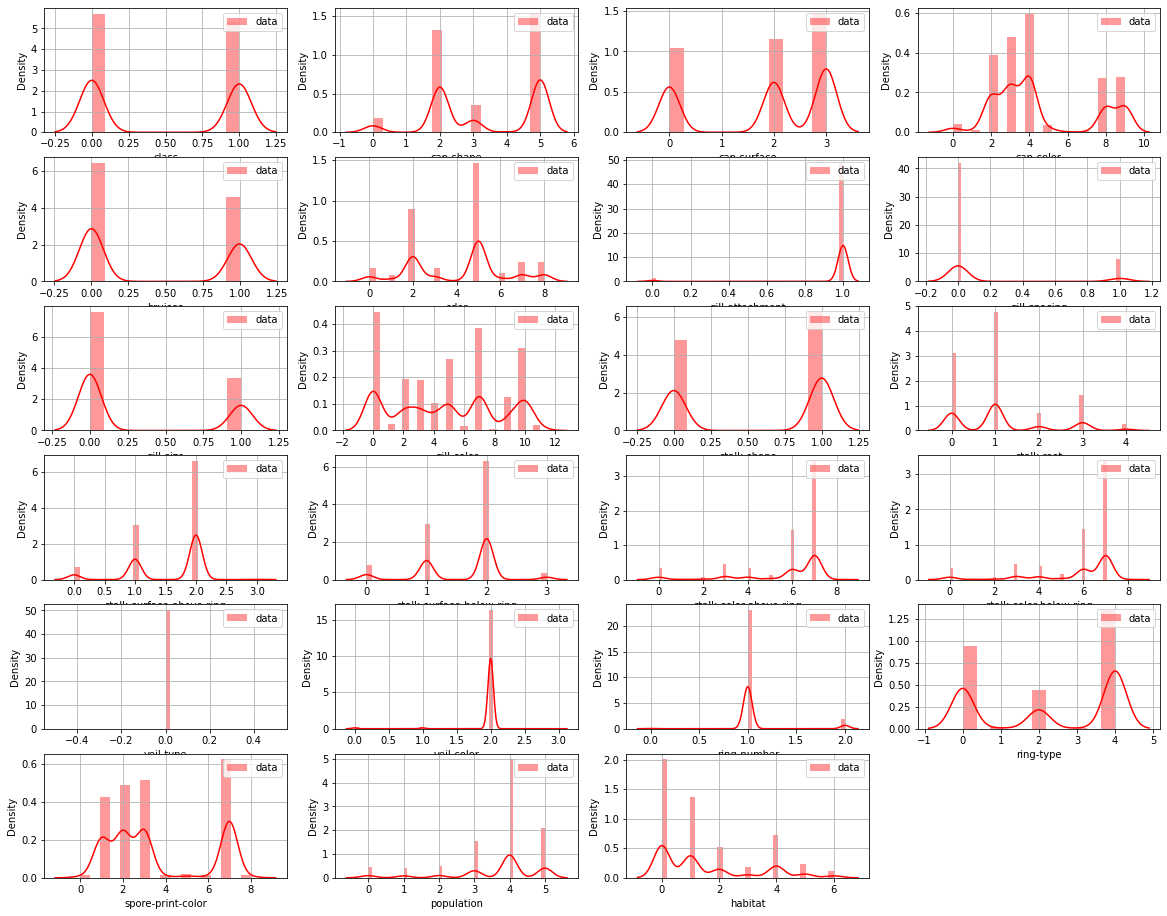

In [23]:
# Plotting DistPlot
plt.figure(figsize=(20,16))
for i,col in enumerate(list(ds.columns.values)):
    plt.subplot(6,4,i+1)
    sns.distplot(ds[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout


In [29]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)
print("Gradient Booster Classifier report: \n\n", classification_report(y_test, y_pred_gbc))
print("Test Accuracy: {}%".format(round(gbc.score(x_test, y_test)*100, 2)))

Gradient Booster Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


In [33]:
#k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.998769987699877
[[432   1]
 [  0 380]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [38]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
print("Support vector Classifier report: \n\n", classification_report(y_test, y_pred_svc))
print("Test Accuracy: {}%".format(round(svc.score(x_test, y_test)*100, 2)))

Support vector Classifier report: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       433
           1       1.00      0.99      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 99.63%


In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic regression report: \n\n", classification_report(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100, 2)))

Logistic regression report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813

Test Accuracy: 95.08%


In [41]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = lr.predict(x_test)
print("Random forest classifier report: \n\n", classification_report(y_test, y_pred_rfc))
print("Test Accuracy: {}%".format(round(rfc.score(x_test, y_test)*100, 2)))

Random forest classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813

Test Accuracy: 100.0%


In [50]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GradientBoostingClassifier',gbc))
models.append(('RandomForestClassifier',rfc))

In [51]:
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
       # print('r2 score corresponding to random state ',r_state,'is: ',acc_score)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [54]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_test, y_test)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    print('\n')
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier()


Max Accuracy Score corresponding to Random State  65 is: 1.0


Learning Score :  1.0
Accuracy Score :  1.0


Cross Val Score :  0.9460983464514449


*************************** SVC *****************************


SVC()


Max Accuracy Score corresponding to Random State  77 is: 0.9949664429530202


Learning Score :  0.9949664429530202
Accuracy Score :  0.9949664429530202


Cross Val Score :  0.9171607922975781


*************************** LogisticRegression *****************************


LogisticRegression()


Max Accuracy Score corresponding to Random State  59 is: 0.9574944071588367


Learning Score :  0.9574944071588367
Accuracy Score :  0.9574944071588367


Cross Val Score :  0.8796195141754373


*************************** DecisionTreeClassifier *****************************


DecisionTreeClassifier()


Max Accuracy Score corresponding to Random State  42 is: 1.0


Learning S

<AxesSubplot:>

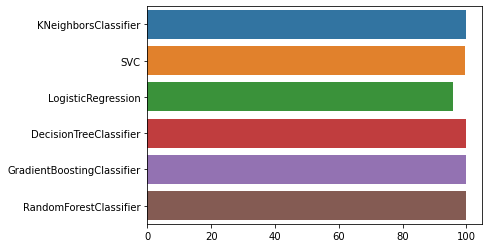

In [55]:
sns.barplot(y=Model,x=Acc_score)

In [60]:
joblib.dump(svc,"svmodel.obj")

['svmodel.obj']

In [61]:
svfile=joblib.load("svmodel.obj")
svfile.predict(x_train)

array([0, 0, 1, ..., 0, 0, 1])